In [ ]:
# LOGISTIC REGRESSION

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
iris_data = pd.read_csv("iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# mapping
iris_data["Species"] = iris_data["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
# target and testing data
X = iris_data.drop(columns=["Species","Id"])
y = iris_data["Species"]

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression(max_iter=1000)
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")



print("precision score is: ", precision_score(y_test, y_pred, average=None))

# we get a perfect score since the dataset is small
# precision score is given in an array in which it gives precision data for every species

accuracy score is:  100.0 %
precision score is:  [1. 1. 1.]


In [22]:
# to make dataset and testing complicated we ony train the 30 percent data and test on 70 %

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42
)
model = LogisticRegression(max_iter=1000)
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")
print("precision score is: ", precision_score(y_test, y_pred, average=None))
print("recall score: ", recall_score(y_test,y_pred, average=None))

accuracy score is:  94.28571428571428 %
precision score is:  [1.         0.90909091 0.90625   ]
recall score:  [1.         0.90909091 0.90625   ]


In [26]:
## KNN 

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

classifier = KNeighborsClassifier()
param_grid = {"knn__n_neighbors" : [1,3,5,7,9]} # The knn__ prefix is used in the Pipeline to specify that the n_neighbors hyperparameter belongs to the KNN classifier step.
classifierCV = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="recall_macro"
)

classifierCV.fit(X_train,y_train) # now we dont have to use scale data since pipeline is already doing the work for us
y_pred = classifierCV.predict(X_test)
print("recall score: ", recall_score(y_test,y_pred, average=None))
print("accuracy score: ", accuracy_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred, average=None))
print(classifierCV.best_params_)

recall score:  [1.         0.96969697 0.84375   ]
accuracy score:  0.9428571428571428
precision score:  [1.         0.86486486 0.96428571]
{'knn__n_neighbors': 3}


In [21]:
#Naivebayes
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
y_pred = gnb_model.predict(X_test)
print("recall score: ", recall_score(y_test,y_pred,average=None))

recall score:  [1.         0.87878788 0.9375    ]


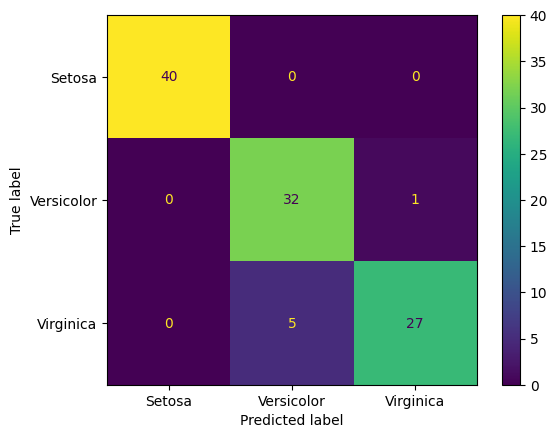

In [29]:
# WHERE MY MODEL MADE MISTAKES

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

figure = ConfusionMatrixDisplay.from_estimator(
    classifierCV, 
    X_test, 
    y_test, 
    display_labels=["Setosa", "Versicolor", "Virginica"]
)

plt.savefig('figure')